<a href="https://colab.research.google.com/github/Chhayaonly/food101/blob/main/week1/week1Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/california_housing_train.csv')


In [3]:
arr = np.array(df.drop('median_house_value', axis=1)).T
means = np.mean(arr, axis=1)  # Mean of each feature (rows in transposed array)
stds = np.std(arr, axis=1)    # Standard deviation of each feature

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_train = np.array(df['median_house_value'])  # extract the price column from data
x_train = arr.T



In [4]:
def loss(y_pred,y_true):

  m=y_pred.shape[0]
  diff = np.subtract(y_pred,y_true)
  sq=np.matmul(diff.T,diff)
  mse=np.sum(sq)/(2*m)
  return mse

In [5]:
def y_prediction(x,a,b):

  m,n = x.shape
  bais_mat=np.full((m,),b)
  y_pred =np.matmul(x,a) + bais_mat

  assert(y_pred.shape == (m,))
  return y_pred

In [6]:
def gradient(x,a,b,y_true):

  m,n = x.shape
  yp = y_prediction(x,a,b)

  # Compute gradient for weights a as da
  diff = np.subtract(yp,y_true)
  da=(np.matmul(diff.T,x))/m

  # Compute gradients for bias b as db
  db=np.sum(diff.T)/m
  assert(da.shape ==(n,))
  return (da,db)

In [7]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):

  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.random.normal(0, 0.5, size = (n,)) * np.sqrt(2/n)     # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    derivativea,derivativeb=gradient(x,a,b,y_true)
    # apply gradient descent now to update a and b
    a= a- learning_rate*derivativea
    b= b- learning_rate*derivativeb
    # calculate loss at this point using loss() function
    # Store loss in the list loss_mse
    yp = y_prediction(x,a,b)
    currentloss=loss(yp,y_true)
    loss_mse.append(currentloss)
    print("Epoch ",i+1," Completed!","loss = ",currentloss) #print l_mse

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

In [8]:
epochs = 400          # tweak this!!!
learn_rate = 0.02          # choose learning rate wisely otherwise loss may diverge!!

train_loss ,a,b = gradient_descent(x_train, y_train, learn_rate, epochs)
print(train_loss)

Epoch  1  Completed! loss =  27218731537.69409
Epoch  2  Completed! loss =  26264585908.982822
Epoch  3  Completed! loss =  25348446579.940693
Epoch  4  Completed! loss =  24468755750.1068
Epoch  5  Completed! loss =  23624025057.532734
Epoch  6  Completed! loss =  22812831694.305347
Epoch  7  Completed! loss =  22033814844.123985
Epoch  8  Completed! loss =  21285672404.051228
Epoch  9  Completed! loss =  20567157957.822857
Epoch  10  Completed! loss =  19877077972.595104
Epoch  11  Completed! loss =  19214289194.84169
Epoch  12  Completed! loss =  18577696224.386833
Epoch  13  Completed! loss =  17966249248.35796
Epoch  14  Completed! loss =  17378941919.233246
Epoch  15  Completed! loss =  16814809363.205845
Epoch  16  Completed! loss =  16272926306.83871
Epoch  17  Completed! loss =  15752405311.486126
Epoch  18  Completed! loss =  15252395106.24695
Epoch  19  Completed! loss =  14772079011.321291
Epoch  20  Completed! loss =  14310673444.59474
Epoch  21  Completed! loss =  1386742

Epoch  1  Completed! loss =  26642621742.409847
Epoch  2  Completed! loss =  25739150736.55922
Epoch  3  Completed! loss =  24870425361.45505
Epoch  4  Completed! loss =  24035094342.90509
Epoch  5  Completed! loss =  23231860175.21087
Epoch  6  Completed! loss =  22459476832.237816
Epoch  7  Completed! loss =  21716747595.451725
Epoch  8  Completed! loss =  21002522990.50333
Epoch  9  Completed! loss =  20315698824.804863
Epoch  10  Completed! loss =  19655214319.29713
Epoch  11  Completed! loss =  19020050328.26737
Epoch  12  Completed! loss =  18409227641.659084
Epoch  13  Completed! loss =  17821805364.82617
Epoch  14  Completed! loss =  17256879371.13411
Epoch  15  Completed! loss =  16713580823.208649
Epoch  16  Completed! loss =  16191074758.98466
Epoch  17  Completed! loss =  15688558739.019886
Epoch  18  Completed! loss =  15205261551.816204
Epoch  19  Completed! loss =  14740441974.138218
Epoch  20  Completed! loss =  14293387583.540531
Epoch  21  Completed! loss =  138634136

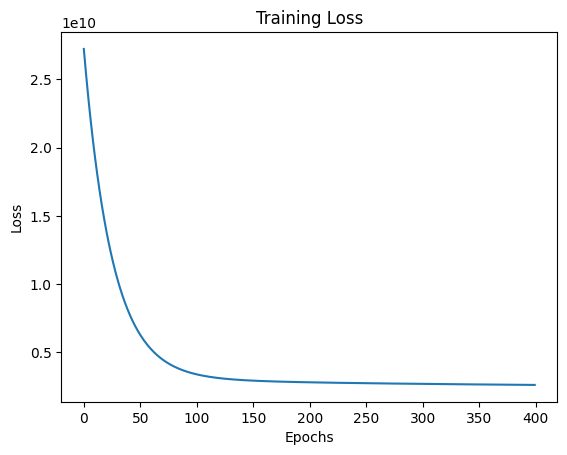

In [9]:
test_df = pd.read_csv("/content/california_housing_test.csv")

arr1 = np.array(test_df.drop('median_house_value', axis=1)).T

# Scale test data using mean and standard deviation of train data
for i in range(len(arr1)):
    arr1[i] = (arr1[i] - means[i]) / stds[i]

y_test = np.array(test_df['median_house_value'])                                                                                                            # extract the price column from data

x_test = arr1.T
test_loss ,a,b = gradient_descent(x_test, y_test, learn_rate, epochs)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot([i for i in range(epochs)], train_loss)     # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()